#Regression & Its Evaluation

1.What is Simple Linear Regression?

**Answer:**  
Simple Linear Regression (SLR) models the relationship between one independent variable \(X\) and a single dependent variable \(Y\) using a straight line:

\[ Y = \beta_0 + \beta_1 X + \varepsilon \]

- \(\beta_0\) is the intercept (expected value of \(Y\) when \(X=0\)).  
- \(\beta_1\) is the slope (expected change in \(Y\) for a one-unit increase in \(X\)).  
- \(\varepsilon\) is the error term capturing effects not explained by \(X\).

The parameters \(\beta_0, \beta_1\) are commonly estimated via Ordinary Least Squares (OLS), which finds the line that minimizes the sum of squared residuals. SLR is used for explanation (quantifying association) and prediction (estimating \(Y\) for new values of \(X\)).


2.What are the key assumptions of Simple Linear Regression?

**Answer:**  
1. **Linearity:** The expected value of \(Y\) is a linear function of \(X\).  
2. **Independence:** Observations (and errors) are independent.  
3. **Homoscedasticity:** The error variance is constant across all values of \(X\).  
4. **Normality of Errors:** The errors are approximately normally distributed (primarily needed for valid inference).  
5. **No Perfect Multicollinearity:** (Trivial for SLR with one predictor.)  
6. **Correct Model Specification:** No important variables omitted, no unnecessary terms included; the functional form is appropriate.


3.What is heteroscedasticity, and why is it important to address in regression models?

**Answer:**  
Heteroscedasticity occurs when the variance of the errors is not constant across levels of the predictor(s). In the presence of heteroscedasticity:

- OLS estimates remain unbiased, but no longer efficient.  
- Standard errors can be biased, leading to misleading t-tests, p-values, and confidence intervals.  

How to address:
- Inspect residual plots; apply transformations (e.g., log, Box–Cox) to stabilize variance.  
- Use heteroscedasticity-robust standard errors (e.g., HC1/HC3).  
- Consider Weighted Least Squares (WLS) if the variance structure is known or can be modeled.  
- Revisit feature engineering and model specification.


4.What is Multiple Linear Regression?

**Answer:**  
Multiple Linear Regression (MLR) extends SLR to model \(Y\) using two or more predictors \(X_1, X_2, \dots, X_p\):

\[ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p + \varepsilon \]

It quantifies the marginal (partial) effect of each predictor while holding others constant. Estimation commonly uses OLS. Diagnostics include multicollinearity checks (e.g., VIF), residual analysis, and evaluation metrics (\(R^2\), adjusted \(R^2\), RMSE).


5.What is polynomial regression, and how does it differ from linear regression?

**Answer:**  
Polynomial regression models nonlinear relationships by including powers of predictors (e.g., \(X, X^2, X^3\)), while still being linear in parameters:

\[ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \cdots + \beta_d X^d + \varepsilon \]

It differs from basic linear regression (with just \(X\)) by allowing curvature in the fitted relationship. Careful choice of degree \(d\) (via cross-validation or information criteria) helps avoid overfitting.


Intercept: 0.1800
Slope: 1.9800
R^2: 0.9979


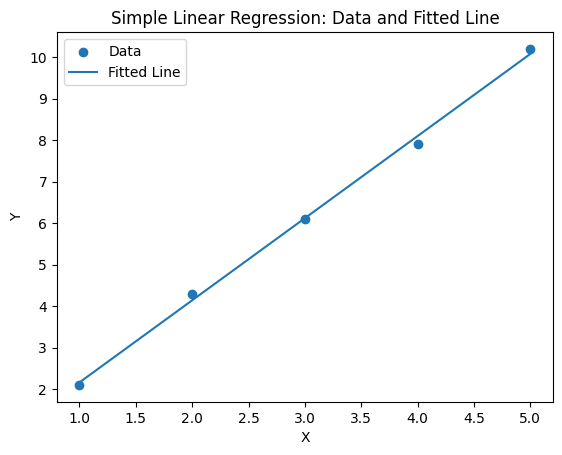

In [ ]:
'''
6. Implement a Python program to fit a Simple Linear Regression model to the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])


model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)


intercept = model.intercept_
slope = model.coef_[0]
r2 = r2_score(Y, y_pred)

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"R^2: {r2:.4f}")

plt.figure()
plt.scatter(X, Y, label='Data')
plt.plot(X, y_pred, label='Fitted Line')
plt.title('Simple Linear Regression: Data and Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [ ]:
'''
7.Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.
'''

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')


Area = np.array([1200, 1500, 1800, 2000])
Rooms = np.array([2, 3, 3, 4])
Price = np.array([250000, 300000, 320000, 370000])

df = pd.DataFrame({'Area': Area, 'Rooms': Rooms, 'Price': Price})


X = sm.add_constant(df[['Area', 'Rooms']])
y = df['Price']
ols_model = sm.OLS(y, X).fit()

print(ols_model.summary())


X_vif = X.copy()
vif_data = pd.DataFrame({
    'feature': X_vif.columns,
    'VIF': [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]})
print("\nVariance Inflation Factors:\n", vif_data)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Mon, 01 Sep 2025   Prob (F-statistic):             0.0377
Time:                        09:19:18   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

Coefficients (for [X, X^2]): [1.94 0.2 ]
Intercept: 0.0600000000000005
R^2: 0.999274398355303


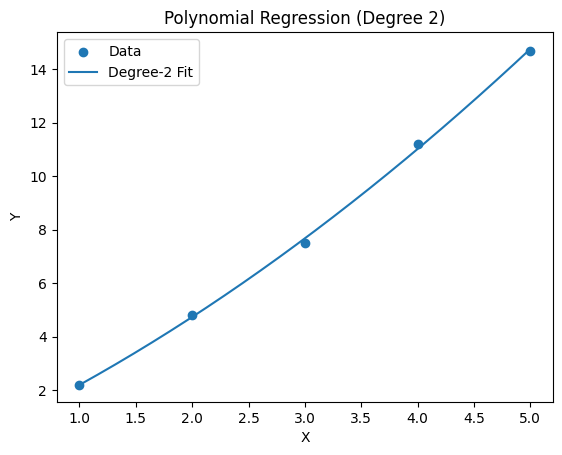

In [ ]:
'''
Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])


poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)


model = LinearRegression()
model.fit(X_poly, Y)
y_pred = model.predict(X_poly)

print("Coefficients (for [X, X^2]):", model.coef_)
print("Intercept:", model.intercept_)
print("R^2:", r2_score(Y, y_pred))


X_plot = np.linspace(1, 5, 200).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)


plt.figure()
plt.scatter(X, Y, label='Data')
plt.plot(X_plot, y_plot, label='Degree-2 Fit')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     83.53
Date:                Mon, 01 Sep 2025   Prob (F-statistic):            0.00277
Time:                        09:19:54   Log-Likelihood:                -12.723
No. Observations:                   5   AIC:                             29.45
Df Residuals:                       3   BIC:                             28.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5000      4.173      1.558      0.2

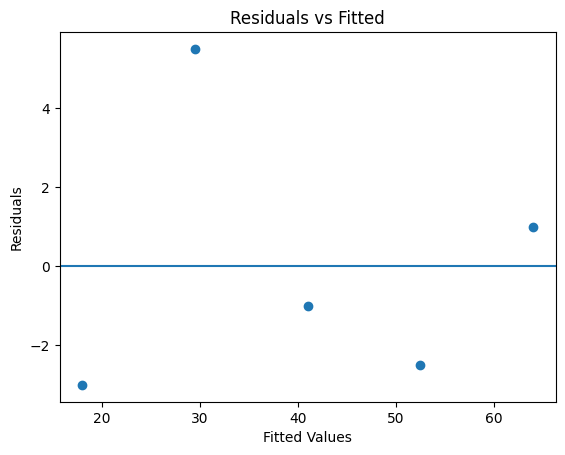


Breusch-Pagan test:
LM Statistic: 1.3654789844249848
LM p-value: 0.2425901780843907
F-statistic: 1.1270912826533377
F p-value: 0.3662892398868645


In [ ]:
'''
9.Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.
'''

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

import warnings
warnings.filterwarnings('ignore')


X = np.array([10, 20, 30, 40, 50])
Y = np.array([15, 35, 40, 50, 65])


X1 = sm.add_constant(X)
model = sm.OLS(Y, X1).fit()
y_pred = model.predict(X1)
residuals = Y - y_pred

print(model.summary())


plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


bp_test = het_breuschpagan(residuals, X1)
bp_labels = ['LM Statistic', 'LM p-value', 'F-statistic', 'F p-value']
print("\nBreusch-Pagan test:")
for label, val in zip(bp_labels, bp_test):
    print(f"{label}: {val}")


10.Real estate price prediction — handling heteroscedasticity and multicollinearity

**Answer:**  
To ensure a robust model when both issues are present:

1) Diagnose clearly  
- Plot residuals vs fitted to assess variance patterns; run tests like Breusch–Pagan or White.  
- Check multicollinearity using VIF and correlation matrices.

2) Address heteroscedasticity  
- Apply transformations (e.g., log(Price), log(Area)) to stabilize variance.  
- Use heteroscedasticity-robust standard errors (HC3) for inference.  
- Consider Weighted Least Squares (WLS) if variance relates to predictors (e.g., variance grows with Area).  
- Re-specify the model to capture nonlinearities (e.g., polynomial terms, interactions, or spatial/location encoding).

3) Address multicollinearity  
- Remove or combine redundant predictors (e.g., Area and Rooms may be correlated).  
- Use regularization (Ridge reduces variance; Lasso can perform feature selection).  
- Center/standardize predictors to aid stability; consider PCA for highly correlated blocks.  
- Collect more diverse data if feasible.

4) Validate  
- Use train/validation/test split or cross-validation to evaluate generalization.  
- Track metrics (RMSE/MAE, adjusted \(R^2\)), check residual diagnostics again after fixes.  
- Document assumptions, preprocessing, and limitations for stakeholders.
